### **Network Analysis**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Friends.csv**, **Follows.csv**, and **Dolphins.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

**Look at CSV files:** node pairs

### Undirected graph (Friends)

In [ ]:
# Load graph from CSV file with no header
f = open('/content/drive/MyDrive/Google Colab/Network Analysis/Copy of Friends.csv')
G = nx.read_edgelist(f, delimiter=',', nodetype=str)
print(G)

Graph with 10 nodes and 15 edges


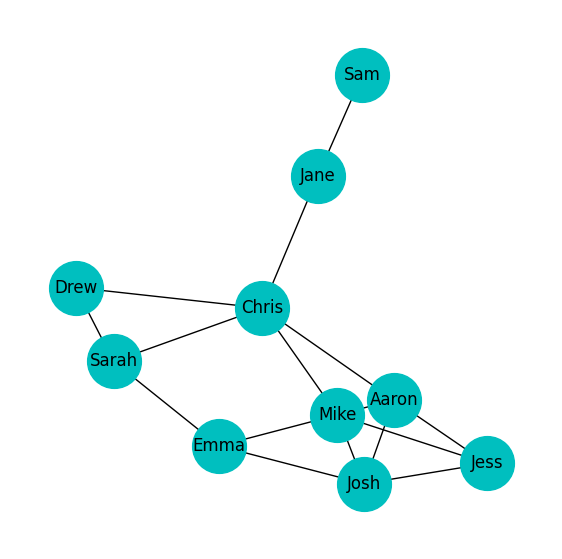

In [ ]:
# Display graph
# First two lines size drawing for Jupyter notebook
# Note layout differs each time
plt.figure(figsize=(7,7))
plt.margins(x=0.1, y=0.1)
nx.draw(G, with_labels=True, node_size=1500, node_color='c')

In [ ]:
# Density of graph
numnodes = G.number_of_nodes()
numedges = G.number_of_edges()
possedges = G.number_of_nodes() * (G.number_of_nodes()-1) / 2
print('Number of nodes:', numnodes)
print('Number of edges:', numedges)
print('Possible edges:', possedges)
print('Density (edges divided by possible edges):', numedges/possedges)

Number of nodes: 10
Number of edges: 15
Possible edges: 45.0
Density (edges divided by possible edges): 0.3333333333333333


In [ ]:
# Did previous cell get right answer?
print('Using density function:', nx.density(G))

Using density function: 0.3333333333333333


In [ ]:
# Diameter and overall average shortest distance
print('Diameter:', nx.diameter(G))
print('Average shortest distance:', nx.average_shortest_path_length(G))

Diameter: 4
Average shortest distance: 2.022222222222222


In [ ]:
# Maximal cliques
cliques = nx.find_cliques(G) # cliques is iterator
for c in cliques:
  print(c)
# Try print cliques
# Modify code to only print cliques > 2

['Emma', 'Aaron', 'Josh']
['Emma', 'Sarah']
['Chris', 'Aaron']
['Chris', 'Jane']
['Chris', 'Sarah', 'Drew']
['Chris', 'Mike']
['Sam', 'Jane']
['Josh', 'Jess', 'Aaron']
['Josh', 'Jess', 'Mike']


In [ ]:
# Iterating through nodes of the graph
for n in G:
    print(n)

Aaron
Chris
Emma
Josh
Drew
Jane
Jess
Mike
Sarah
Sam


In [ ]:
# Number of friends -'degree' is number of edges incident on a node
numfriends = G.degree
print(numfriends)
# for n in numfriends:
#    print(n[0], 'has', n[1], 'friends')
# Or can treat list of pairs like a dictionary
# for n in G:
#    print(n, 'has', numfriends[n], 'friends')

[('Aaron', 4), ('Chris', 5), ('Emma', 3), ('Josh', 4), ('Drew', 2), ('Jane', 2), ('Jess', 3), ('Mike', 3), ('Sarah', 3), ('Sam', 1)]


In [ ]:
# Friends lists
for n in G:
    print(n, 'has friends:')
    friends = G.neighbors(n) # friends is iterator
    for f in friends:
        print(' ', f)

Aaron has friends:
  Chris
  Emma
  Josh
  Jess
Chris has friends:
  Aaron
  Drew
  Jane
  Mike
  Sarah
Emma has friends:
  Aaron
  Josh
  Sarah
Josh has friends:
  Aaron
  Emma
  Jess
  Mike
Drew has friends:
  Chris
  Sarah
Jane has friends:
  Chris
  Sam
Jess has friends:
  Aaron
  Josh
  Mike
Mike has friends:
  Chris
  Josh
  Jess
Sarah has friends:
  Drew
  Chris
  Emma
Sam has friends:
  Jane


In [ ]:
# Friends lists v2
for n in G:
    print(n, 'has friends:', list(G.neighbors(n)))

Aaron has friends: ['Chris', 'Emma', 'Josh', 'Jess']
Chris has friends: ['Aaron', 'Drew', 'Jane', 'Mike', 'Sarah']
Emma has friends: ['Aaron', 'Josh', 'Sarah']
Josh has friends: ['Aaron', 'Emma', 'Jess', 'Mike']
Drew has friends: ['Chris', 'Sarah']
Jane has friends: ['Chris', 'Sam']
Jess has friends: ['Aaron', 'Josh', 'Mike']
Mike has friends: ['Chris', 'Josh', 'Jess']
Sarah has friends: ['Drew', 'Chris', 'Emma']
Sam has friends: ['Jane']


In [ ]:
# Closeness centrality - average shortest distance to other nodes, normalized on reverse 0-1 scale
cc = nx.closeness_centrality(G)
print(cc)
# sorted_keys = sorted(cc, key=cc.get, reverse=True)
# print(sorted_keys)
# for k in sorted_keys:
#    print(k, 'has closeness centrality', cc[k])

{'Aaron': 0.6, 'Chris': 0.6923076923076923, 'Emma': 0.5, 'Josh': 0.5, 'Drew': 0.47368421052631576, 'Jane': 0.47368421052631576, 'Jess': 0.45, 'Mike': 0.5625, 'Sarah': 0.5294117647058824, 'Sam': 0.3333333333333333}


In [ ]:
# Betweenness centrality - number of shortest paths it's on, normalized on 0-1 scale
bc = nx.betweenness_centrality(G)
sorted_keys = sorted(bc, key=bc.get, reverse=True)
for k in sorted_keys:
    print(k, 'has betweenness centrality', bc[k])

Chris has betweenness centrality 0.5555555555555556
Jane has betweenness centrality 0.2222222222222222
Aaron has betweenness centrality 0.1759259259259259
Mike has betweenness centrality 0.11342592592592592
Sarah has betweenness centrality 0.0787037037037037
Emma has betweenness centrality 0.0648148148148148
Josh has betweenness centrality 0.05787037037037036
Jess has betweenness centrality 0.009259259259259259
Drew has betweenness centrality 0.0
Sam has betweenness centrality 0.0


### Directed graph (Followers)

In [ ]:
# Load graph from CSV file with no header
f = open('/content/drive/MyDrive/Google Colab/Network Analysis/Copy of Follows.csv')
D = nx.read_edgelist(f, delimiter=',', nodetype=str, create_using=nx.DiGraph())
print(D)

DiGraph with 10 nodes and 18 edges


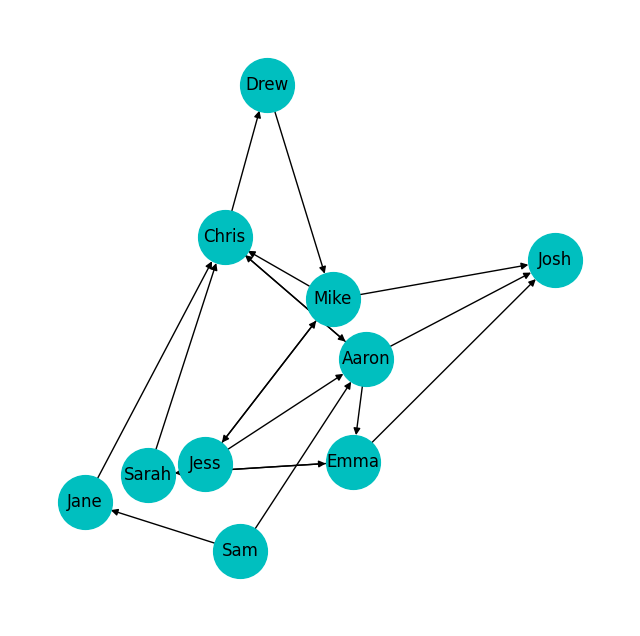

In [ ]:
# Display graph
plt.figure(figsize=(8,8))
plt.margins(x=0.1, y=0.1)
nx.draw(D, with_labels=True, node_size=1500, arrows=True, node_color='c')

In [ ]:
# Number of follows and followers
follows = D.out_degree
followers = D.in_degree
print('Number of follows: ', follows)
print('Number of followers: ', followers)
# Can treat list of pairs like a dictionary
# for n in D:
#    print(n, 'follows', follows[n], 'and has', followers[n], 'followers')

Number of follows:  [('Aaron', 3), ('Chris', 2), ('Emma', 2), ('Josh', 0), ('Drew', 1), ('Mike', 3), ('Sarah', 2), ('Jane', 1), ('Jess', 2), ('Sam', 2)]
Number of followers:  [('Aaron', 3), ('Chris', 4), ('Emma', 2), ('Josh', 3), ('Drew', 1), ('Mike', 2), ('Sarah', 1), ('Jane', 1), ('Jess', 1), ('Sam', 0)]


In [ ]:
# Reciprocity - people that follow each other (see what's wrong and fix it)
for n in D:
    # print(n, list(D.neighbors(n)))
   for n2 in list(D.neighbors(n)):
       if n in list(D.neighbors(n2)):
           print(n, 'and', n2, 'follow each other')

Aaron and Chris follow each other
Chris and Aaron follow each other
Emma and Sarah follow each other
Mike and Jess follow each other
Sarah and Emma follow each other
Jess and Mike follow each other


In [ ]:
# Cycles
cycles = nx.simple_cycles(D)
for c in cycles:
    print(c)

['Emma', 'Sarah', 'Chris', 'Aaron']
['Emma', 'Sarah', 'Chris', 'Drew', 'Mike', 'Jess', 'Aaron']
['Emma', 'Sarah']
['Chris', 'Aaron']
['Chris', 'Drew', 'Mike']
['Chris', 'Drew', 'Mike', 'Jess', 'Aaron']
['Jess', 'Mike']


In [ ]:
# Alternative reciprocity
cycles = nx.simple_cycles(D)
for c in cycles:
    if len(c) == 2:
        print(c[0], 'and', c[1], 'follow each other')

Emma and Sarah follow each other
Chris and Aaron follow each other
Jess and Mike follow each other


### <font color="green">**Your Turn: Dolphins Data**</font>

Graph with 62 nodes and 159 edges


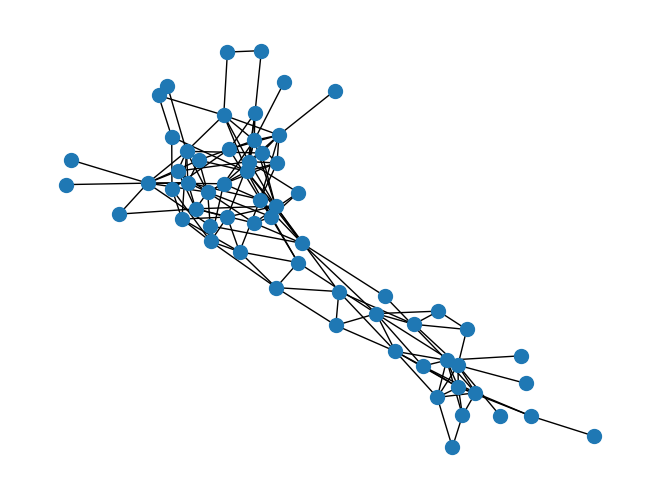

In [ ]:
# Load the dolphin friends data and print the graph
f = open('/content/drive/MyDrive/Google Colab/Network Analysis/Copy of Dolphins.csv')
G = nx.read_edgelist(f, delimiter=',', nodetype=str)
print(G)
nx.draw(G, node_size=100)

<b>Friendliest dolphin:</b><br><i>Find the dolphin with the most friends. Don't worry about ties - there's one who's the friendliest. Print the dolphin's identifier and the number of friends the dolphin has.</i>

In [ ]:
# Reminder: G.degree returns a list with the number of edges incident on each node
# Hint: Iterate through the G.degree list keeping track of the dolphin with the most
# friends, and how many friends it has
friendliest = 0
maxnumfriends = 0
numfriends = G.degree

for n in numfriends:
  if n[1] > maxnumfriends:
    friendliest = n[0]
    maxnumfriends = n[1]

print('Number of follows: ', friendliest, 'with', maxnumfriends, 'friends')

Number of follows:  15 with 12 friends


<b>Dolphin friend recommendation, a type of "link prediction":</b><br>
<i>Find all pairs of dolphins who are not friends but have at least four friends in common. Print each pair only once, and include a list of the friends they have in common.</i>

In [ ]:
# The following code finds the common friends of all pairs of dolphins in the graph
# (without eliminating self-pairs or reverse-pairs).
# You can use it as a starting point for solving the problem.
for n1 in G:
    for n2 in G:
        if n1 < n2 and n2 not in G.neighbors(n1):
            common = set(G.neighbors(n1)) & set(G.neighbors(n2))
            if len(common) >= 4:
                print('Dolphins', n1, 'and', n2, 'have friends', list(common), 'in common')

Dolphins 6 and 7 have friends ['58', '14', '57', '10'] in common
Dolphins 10 and 55 have friends ['58', '42', '14', '7'] in common
Dolphins 16 and 52 have friends ['56', '46', '25', '19'] in common
Dolphins 17 and 44 have friends ['38', '39', '15', '34'] in common
Dolphins 18 and 42 have friends ['10', '58', '14', '2'] in common
Dolphins 18 and 55 have friends ['58', '14', '7', '2'] in common
Dolphins 22 and 25 have friends ['46', '52', '19', '30'] in common
Dolphins 38 and 39 have friends ['44', '17', '15', '34'] in common
Dolphins 38 and 51 have friends ['34', '17', '15', '46'] in common
Dolphins 39 and 51 have friends ['21', '17', '15', '34'] in common
Dolphins 42 and 7 have friends ['55', '58', '14', '10'] in common
